# **Introduction to the modeling and simulation of Cellular Wireless Communication Systems - Part 2**

In [1]:
import numpy as np
from analysis import run
import matplotlib.pyplot as plt
from acess_point import AccessPoint
from user_equipament import UserEquipament
from utils import ajuste_da_reta, count_switches, graphic

#  Exercise 1

In [2]:
sinr, channel_capacity = run(number_ap=64, number_channel=2, number_ue=13, verbose=True)

Para M = 64, K = 13, N = 2:
The 10th percentile of the SINR: 3.246680058580796
The 50th percentile of the SINR: 20.95573833364133
The 10th percentile of the Capacity Channel: 104.31677106483218 Mbps
The 50th percentile of the Capacity Channel: 222.82630727457283 Mbps
Average sum-capacity to 64 AP: 3324.81 Mbps
Spectrum efficiency to 64 AP: 33.25 bits/second/Hz/km²


In [3]:
sinr, channel_capacity = run(number_ap=49, number_channel=2, number_ue=13, verbose=True)

Para M = 49, K = 13, N = 2:
The 10th percentile of the SINR: 1.8761541894578366
The 50th percentile of the SINR: 12.162268526493484
The 10th percentile of the Capacity Channel: 76.20705100666906 Mbps
The 50th percentile of the Capacity Channel: 185.91681274348826 Mbps
Average sum-capacity to 49 AP: 2883.53 Mbps
Spectrum efficiency to 49 AP: 28.84 bits/second/Hz/km²


In [4]:
sinr, channel_capacity = run(number_ap=81, number_channel=2, number_ue=13, verbose=True)

Para M = 81, K = 13, N = 2:
The 10th percentile of the SINR: 5.3415038137322455
The 50th percentile of the SINR: 33.80956026870581
The 10th percentile of the Capacity Channel: 133.24124996120307 Mbps
The 50th percentile of the Capacity Channel: 256.0705842038962 Mbps
Average sum-capacity to 81 AP: 3746.85 Mbps
Spectrum efficiency to 81 AP: 37.47 bits/second/Hz/km²


**Comentário:** 

Comparando o cenário em que M = 64 e M = 49, observa-se que a redução no número de APs implica em um aumento considerável na área de cobertura de cada AP, o que resulta em uma maior distância média entre o AP e o UE. Consequentemente, há uma maior atenuação do sinal, o que provoca uma cobertura mais fraca, resultando em menores valores de SINR e, por consequência, menor capacidade de canal e eficiência espectral.

Por outro lado, ao compararmos os cenários de M = 64 e M = 81, verifica-se que o aumento no número de APs reduz a área de cobertura de cada AP, diminuindo assim a distância média entre AP e UE, devido ao aumento da densidade de APs na área de cobertura. Esse fator contribui para uma melhor qualidade de sinal, refletindo-se em maiores valores de SINR, capacidade de canal e, consequentemente, uma eficiência espectral mais elevada.

#  Exercise 3

In [5]:
sinr, channel_capacity = run(number_ap=64, number_channel=1, number_ue=13, verbose=True)
    
threshold_bit_rate = 25 * 1e6 #bps
outage_rate = np.mean(np.array(channel_capacity) < threshold_bit_rate)

print(f"Outage Rate: {outage_rate*100:.2f}%")

Para M = 64, K = 13, N = 1:
The 10th percentile of the SINR: 0.9064243051282661
The 50th percentile of the SINR: 8.671912267606256
The 10th percentile of the Capacity Channel: 93.08692488044069 Mbps
The 50th percentile of the Capacity Channel: 327.3801158159171 Mbps
Average sum-capacity to 64 AP: 5162.73 Mbps
Spectrum efficiency to 64 AP: 51.63 bits/second/Hz/km²
Outage Rate: 4.35%


**Comentário:** 

Para calcular a Outage Rate, foi calculada a capacidade de canal de cada UE para cada iteração de Monte Carlo e avaliando cada valor de capacidade de acordo com o valor de limiar ($25$ Mbps). E assim, o Outage Rate é determinado como à média de usuários que apresentaram capacidade de canal abaixo do valor de limiar.

Para essa taxa mínima de $25$ Mbps, foi obtida uma Outage Rate de $4,35\%$, valor inferior à tolerância máxima de $5\%$. Assim, conclui-se que este sistema atende ao requisito de qualidade estabelecido pelo serviço de streaming UHD.

#  Exercise 4

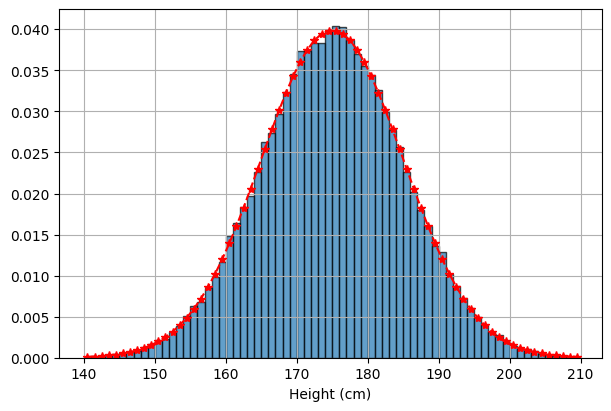

In [6]:
mean, sigma = 175, 10       
heights = np.random.normal(loc=mean, scale=sigma, size=int(1e5))

x = np.arange(140, 210, 1) + 0.5
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / sigma) ** 2)


fig, graf = plt.subplots(figsize = (6, 4), constrained_layout=True)
graf.hist(heights, bins=np.arange(140, 210, 1), density=True, edgecolor='black', alpha=0.7)
graf.plot(x, pdf, color='red', marker='*', linestyle="--")
graf.set(xlabel="Height (cm)")
graf.grid(True)
plt.show()


# Exercise 5 

In [7]:
print("Without the Shadowing Effect")
sinr1, channel_capacity1 = run(number_ap=64, number_channel=2, number_ue=13, shadow_effect=False, verbose=True)

print("\nWith the Shadowing Effect")
sinr2, channel_capacity2 = run(number_ap=64, number_channel=2, number_ue=13, shadow_effect=True, verbose=True)

Without the Shadowing Effect
Para M = 64, K = 13, N = 2:
The 10th percentile of the SINR: 3.2622344244233195
The 50th percentile of the SINR: 20.914145923823337
The 10th percentile of the Capacity Channel: 104.58049720232961 Mbps
The 50th percentile of the Capacity Channel: 222.68952738031078 Mbps
Average sum-capacity to 64 AP: 3330.33 Mbps
Spectrum efficiency to 64 AP: 33.30 bits/second/Hz/km²

With the Shadowing Effect
Para M = 64, K = 13, N = 2:
The 10th percentile of the SINR: 0.4682731721421913
The 50th percentile of the SINR: 20.336092919398737
The 10th percentile of the Capacity Channel: 27.70602032428161 Mbps
The 50th percentile of the Capacity Channel: 220.76120539294445 Mbps
Average sum-capacity to 64 AP: 3277.07 Mbps
Spectrum efficiency to 64 AP: 32.77 bits/second/Hz/km²


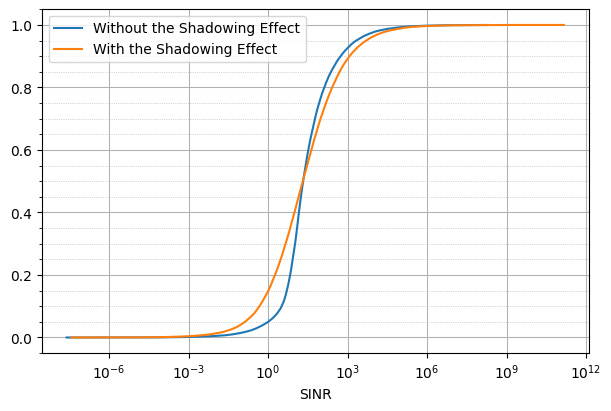

In [8]:
graphic(values=[sinr1, sinr2], 
        labels=["Without the Shadowing Effect", "With the Shadowing Effect"], 
        xlabel="SINR")

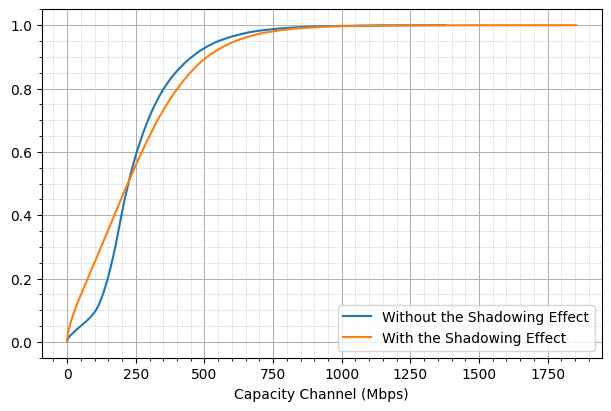

In [9]:
channel_capacity1 = [c / 1e6 for c in channel_capacity1]
channel_capacity2 = [c / 1e6 for c in channel_capacity2]
graphic(values=[channel_capacity1, channel_capacity2], 
        labels=["Without the Shadowing Effect", "With the Shadowing Effect"], 
        xlabel="Capacity Channel (Mbps)")

**Comentário:**

Com a introdução do efeito de shadowing, há um aumento na variabilidade do canal entre cada par de UE e AP, afetando principalmente os usuários em condições desfavoráveis. A adição desse efeito resultou em uma redução significativa do 10th percentil tanto do SINR quanto da capacidade de canal, indicando uma piora nas condições de comunicação para esses usuários.

Por outro lado, esse impacto foi menos perceptível para os usuários em condições medianas, uma vez que a diferença observada no 50th percentil (mediana) foi sutil, tanto para o SINR quanto para a capacidade. Esse comportamento evidencia que o shadowing compromete, sobretudo, o desempenho dos usuários mais vulneráveis, enquanto o desempenho médio do sistema permanece relativamente estável, em termos de sum-capacity e eficiência espectral. 

#  Exercise 6

In [10]:
print("With the Orthogonal Channel Allocation")
sinr1, channel_capacity1 = run(number_ap=64, number_channel=2, number_ue=13, shadow_effect=True, random_channel=False, verbose=True)

print("\nWith the Random Channel Allocation")
sinr2, channel_capacity2 = run(number_ap=64, number_channel=2, number_ue=13, shadow_effect=True, random_channel=True, verbose=True)


With the Orthogonal Channel Allocation
Para M = 64, K = 13, N = 2:
The 10th percentile of the SINR: 0.7952810318466692
The 50th percentile of the SINR: 25.009287582964802
The 10th percentile of the Capacity Channel: 42.21048497098656 Mbps
The 50th percentile of the Capacity Channel: 235.0477484978946 Mbps
Average sum-capacity to 64 AP: 3436.90 Mbps
Spectrum efficiency to 64 AP: 34.37 bits/second/Hz/km²

With the Random Channel Allocation
Para M = 64, K = 13, N = 2:
The 10th percentile of the SINR: 0.4777327344150295
The 50th percentile of the SINR: 20.47410290653184
The 10th percentile of the Capacity Channel: 28.16926822188905 Mbps
The 50th percentile of the Capacity Channel: 221.22629790297958 Mbps
Average sum-capacity to 64 AP: 3275.75 Mbps
Spectrum efficiency to 64 AP: 32.76 bits/second/Hz/km²


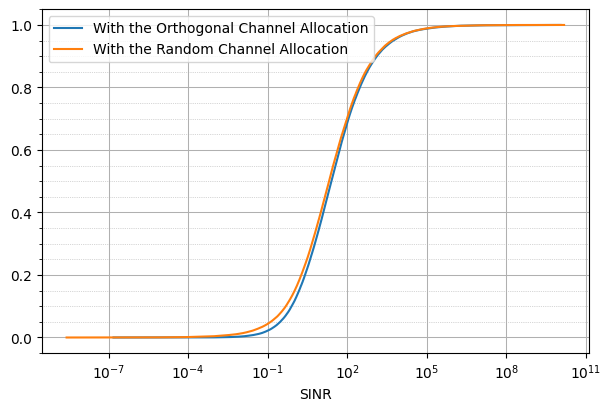

In [11]:
graphic(values=[sinr1, sinr2], 
        labels=["With the Orthogonal Channel Allocation", "With the Random Channel Allocation"], 
        xlabel="SINR")

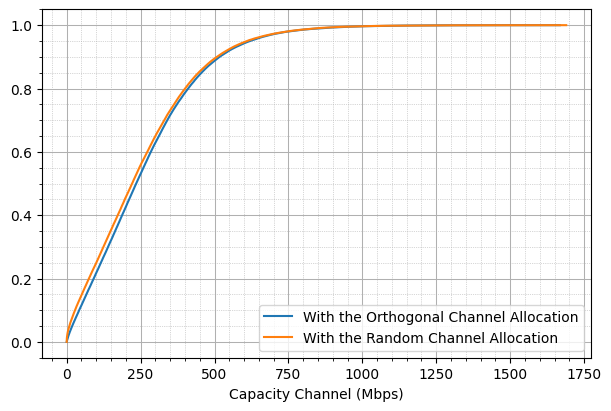

In [12]:
channel_capacity1 = [c / 1e6 for c in channel_capacity1]
channel_capacity2 = [c / 1e6 for c in channel_capacity2]
graphic(values=[channel_capacity1, channel_capacity2], 
        labels=["With the Orthogonal Channel Allocation", "With the Random Channel Allocation"],
        xlabel="Capacity Channel (Mbps)")

**Comentário:** 

Ao comparar a alocação ortogonal de canais com alocação aleatória de canais, observa-se o aumento nos valores de 10th e 50th percentil das métricas do SINR e da capacidade de canal. Esses resultados demonstram que a adoção de estratégias de gerenciamento de recursos de rádio (RRM), como a alocação ortogonal, pode reduzir a interferência intra-celular já que visa minimizar a reutilização de canal dentro de uma mesma célula. 

No entanto, apesar desses ganhos quantitativos nos percentis e mediana, as curvas CDF do SINR e da capacidade de canal apresentaram o mesmo comportamento com um leve deslocamento, quando analisadas graficamente. 


# Exercise 7 

In [13]:
print("Without the Channel Aggregation")
sinr1, channel_capacity1 = run(number_ap=64, number_channel=2, number_ue=13, shadow_effect=True, 
                               random_channel=False, channel_aggregation=False, verbose=True)

print("\nWith the Channel Aggregation")
sinr2, channel_capacity2 = run(number_ap=64, number_channel=2, number_ue=13, shadow_effect=True, 
                               random_channel=False, channel_aggregation=True, verbose=True)


Without the Channel Aggregation
Para M = 64, K = 13, N = 2:
The 10th percentile of the SINR: 0.8015135108787347
The 50th percentile of the SINR: 25.041021843215788
The 10th percentile of the Capacity Channel: 42.460473466604896 Mbps
The 50th percentile of the Capacity Channel: 235.1357077645925 Mbps
Average sum-capacity to 64 AP: 3441.25 Mbps
Spectrum efficiency to 64 AP: 34.41 bits/second/Hz/km²

With the Channel Aggregation
Para M = 64, K = 13, N = 2:
The 10th percentile of the SINR: 0.5385059267768024
The 50th percentile of the SINR: 15.207979096700374
The 10th percentile of the Capacity Channel: 63.868031895831116 Mbps
The 50th percentile of the Capacity Channel: 353.0100048712152 Mbps
Average sum-capacity to 64 AP: 5590.43 Mbps
Spectrum efficiency to 64 AP: 55.90 bits/second/Hz/km²


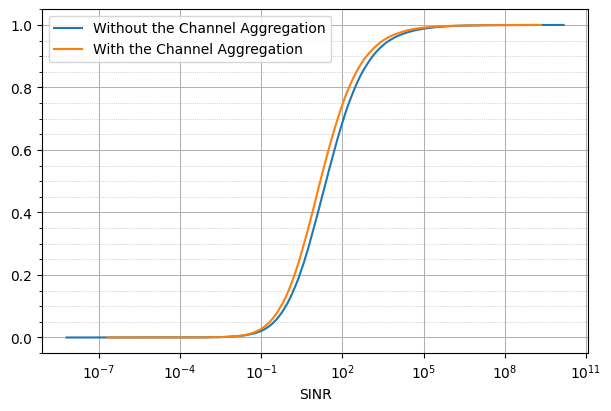

In [14]:
graphic(values=[sinr1, sinr2], 
        labels=["Without the Channel Aggregation", "With the Channel Aggregation"], 
        xlabel="SINR")

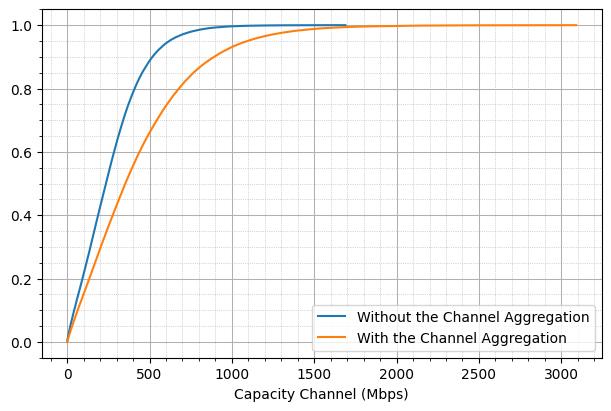

In [15]:
channel_capacity1 = [c / 1e6 for c in channel_capacity1]
channel_capacity2 = [c / 1e6 for c in channel_capacity2]
graphic(values=[channel_capacity1, channel_capacity2], 
        labels=["Without the Channel Aggregation", "With the Channel Aggregation"],
        xlabel="Capacity Channel (Mbps)")

**Comentário:**

O efeito de agregação de canal, há um claro aumento da eficiência espectral, uma vez que se reduz o desperdício de recursos quando há apenas um UE conectado a um AP. Nesses casos, o usuário consegue transmitir simultaneamente em dois canais, somando as capacidades de ambos, o que potencializa significativamente o desempenho do sistema. Observa-se que, com a agregação de canais, um aumento nos valores de 10th e 50th percentil das métricas do SINR e da capacidade de canal. E esse efeito é ainda mais percepitivel para as métricas de desempenho médio, em termos de sum-capacity e eficiência espectral que aumentaram $61 \%$ quando comparados com o cenário sem agregação de canal. 

Graficamente, as curvas CDF do SINR mantiveram um comportamento semelhante, porém com a curva laranja (SINR com agregação de canal) deslocada para a esquerda. Já nas curvas CDF da capacidade de canal, observa-se que a curva azul (sem agregação) é uma "compressão" da curva laranja (com agregação), demonstrando o ganho significativo na capacidade proporcionado pela agregação.

# Exercise 8 

In [16]:
print("Without the Power Control")
sinr1, channel_capacity1 = run(number_ap=36, number_channel=1, number_ue=15, shadow_effect=True, 
                               random_channel=False, channel_aggregation=False, power_control=False, verbose=True)

print("\nWith the Power Control")
sinr2, channel_capacity2 = run(number_ap=36, number_channel=1, number_ue=15, shadow_effect=True, 
                               random_channel=False, channel_aggregation=False, power_control=True, verbose=True)
    


Without the Power Control
Para M = 36, K = 15, N = 1:
The 10th percentile of the SINR: 0.03323893074966808
The 50th percentile of the SINR: 1.9435262154250204
The 10th percentile of the Capacity Channel: 4.717390797711345 Mbps
The 50th percentile of the Capacity Channel: 155.75454763696072 Mbps
Average sum-capacity to 36 AP: 4040.63 Mbps
Spectrum efficiency to 36 AP: 40.41 bits/second/Hz/km²

With the Power Control
Para M = 36, K = 15, N = 1:
The 10th percentile of the SINR: 0.12491471495600734
The 50th percentile of the SINR: 0.5510114610907386
The 10th percentile of the Capacity Channel: 16.981562813016684 Mbps
The 50th percentile of the Capacity Channel: 63.320934705607364 Mbps
Average sum-capacity to 36 AP: 954.45 Mbps
Spectrum efficiency to 36 AP: 9.54 bits/second/Hz/km²


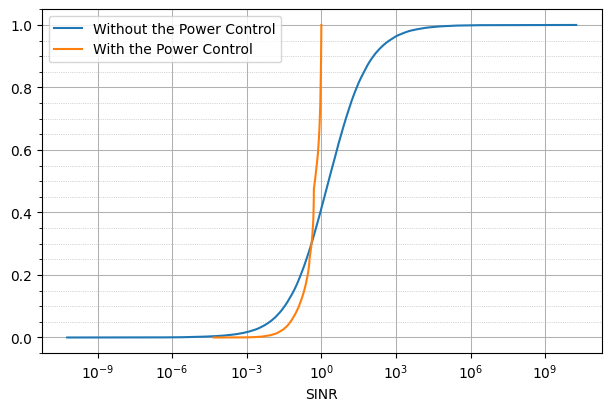

In [17]:
graphic(values=[sinr1, sinr2], 
        labels=["Without the Power Control", "With the Power Control"], 
        xlabel="SINR")

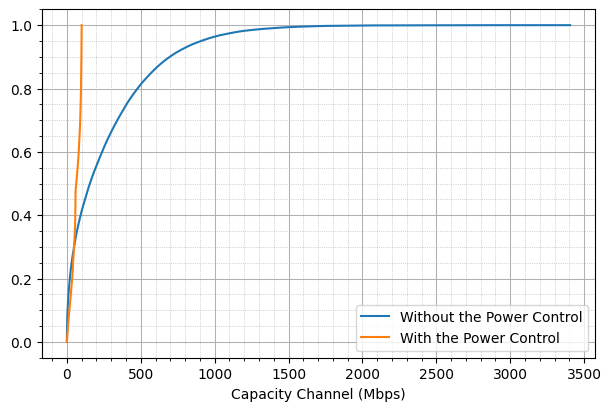

In [18]:
channel_capacity1 = [c / 1e6 for c in channel_capacity1]
channel_capacity2 = [c / 1e6 for c in channel_capacity2]
graphic(values=[channel_capacity1, channel_capacity2], 
        labels=["Without the Power Control", "With the Power Control"],
        xlabel="Capacity Channel (Mbps)")

**Comentário:**

A aplicação do algoritmo de Power Control (PC) com inversão de canal visa garantir um nível mínimo de QoS, estabelecido como $1 bps/Hz$ para todos os usuários. Para isso, cada UE ajusta sua potência de transmissão conforme o ganho de canal e o nível de ruído. Quando aplicando o controle do nível de potência, o 10th percentil do SINR aumentou, evidenciando que os usuários com piores condições de canal foram beneficiados com uma maior potência de transmissão, mas sempre respeitando o limite máximo de potência de $1 W$. Já a mediana, 50th percentil, do SINR diminui já que com o PC, diversos UEs aumentam sua potência para compensar más condições de canal, o que potencializa a interferência mútua e reduz o SINR médio do sistema.

Já para o 10th percentil da capacidade de canal teve um salto significativo, demonstrando a efetividade do PC na melhoria da conectividade para os usuários mais vulneráveis. E quando analisando graficamente a Capacidade de canal a partir das curvas do CDF, temos que a curva sem Power Control (em azul) apresenta uma distribuição mais ampla, alcançando capacidades superiores a $3000 Mbps$, indicando uma maior variação entre as capacidades individuais dos usuários, com alguns usuários obtendo altas taxas, enquanto outros permanecem com baixas capacidades. Já a curva com Power Control (em laranja) é mais inclinada e concentrada na faixa próxima a $0-200 Mbps$, refletindo que Power Control tende a melhorar o desempenho dos usuários com piores condições de canal, mas limita o potencial de usuários que poderiam alcançar taxas maiores, homogenizando a capacidade de canal. 


# Exercise 9 

In [19]:
def power_control(number_ue:int, gains: list, target: float, noise_power = 0.01): 
    
    b = np.divide(target*noise_power, gains)
    A = np.zeros((number_ue, number_ue))
    for i in range(number_ue): 
        for j in range(number_ue): 
            if i != j: 
                A[i, j]= target*(gains[j]/gains[i])
                
    return np.dot(np.linalg.inv(np.eye(number_ue) - A), b)

In [20]:
power = power_control(number_ue=2, gains=[0.1, 0.05], target=0.5)
power

array([0.1, 0.2])

In [21]:
power = power_control(number_ue=2, gains=[0.1, 0.05], target=2)
power

array([-0.2, -0.4])

In [ ]:
power = power_control(number_ue=2, gains=[0.1, 0.05], target=1)
power

**Comentário:**

Ao aplicar o método de controle de potência para dois usuários conectados a um único AP, com ganhos de canal $g_1 = 0.1$ e  $g_2 = 0.05$, e potência de ruído $p_n = 0.01$, observou-se que:

- Para $\gamma_t = 0.5$, a solução foi $[0.1, 0.2]$. Neste caso, as potências são positivas e dentro de um intervalo viável, o que indica que é possível que ambos os usuários atinjam o SINR alvo de forma estável e factível.
- Para $\gamma_t = 2$, a solução foi $[-0.2, -0.4]$. Neste caso, as potências são negativas e fora de um intervalo viável e físico.
- Para $\gamma_t = 1$, não existe solução, ou seja, não há combinação de potências positivas (ou mesmo negativas!) que satisfaça as restrições de SINR simultaneamente para os dois UEs.

Esses resultados mostram que, ao aumentar a exigência de qualidade (SINR alvo), o sistema não consegue atender a demanda, gerando soluções não físicas, com potências negativas. Isso ocorre porque, para valores mais altos de SINR, as potências necessárias superam a capacidade do sistema, levando à inviabilidade matemática e prática da solução.


# Exercise 10

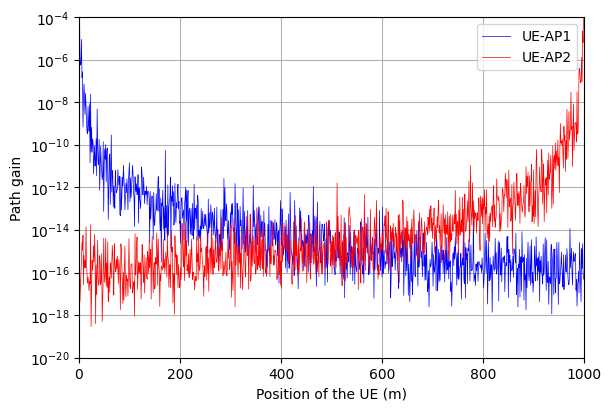

In [23]:
path_gain1, path_gain2 = [], []
for postion in range(1, 1000): 
    ap1 = AccessPoint(position=(0, 0), number_channels=1, bandwidth=100e6, number_ue=2, shadow_effect=True)
    ap2 = AccessPoint(position=(0, 1000), number_channels=1, bandwidth=100e6, number_ue=2, shadow_effect=True)
    
    ue = UserEquipament(access_points=[ap1, ap2], position=(0, postion), random_channel=True, power_control=False)
    
    path_gain1.append(ue.path_gain(ap1))
    path_gain2.append(ue.path_gain(ap2))


fig, graf = plt.subplots(figsize = (6, 4), constrained_layout=True)
graf.plot(range(1, 1000), path_gain1, color="b", linewidth=0.5, label="UE-AP1")
graf.plot(range(1, 1000), path_gain2, color="r", linewidth=0.5, label="UE-AP2")
graf.set(title="", xlabel=f"Position of the UE (m)", ylabel="Path gain")
graf.set(xlim=(0, 1000), ylim=(1e-20, 1e-4))
graf.grid(True, which='major', linestyle='-', linewidth=0.75)
graf.set_yscale('log')
graf.legend()
plt.show()

# Exercise 11

In [24]:
def soft_handover(ue: UserEquipament, access_points:list[AccessPoint]): 
    power_received = [ue.power_received(ap) for ap in access_points]
    index_ap = np.argmax(power_received)
    return index_ap + 1
     
def hard_handover(ue: UserEquipament, ap: AccessPoint, power_min:float = 1e-16):
    power_received = ue.power_received(ap)
    if power_received <= power_min: 
        ue.index_ap = 1 if int(ue.index_ap) == 0 else 0
    return int(ue.index_ap) + 1 



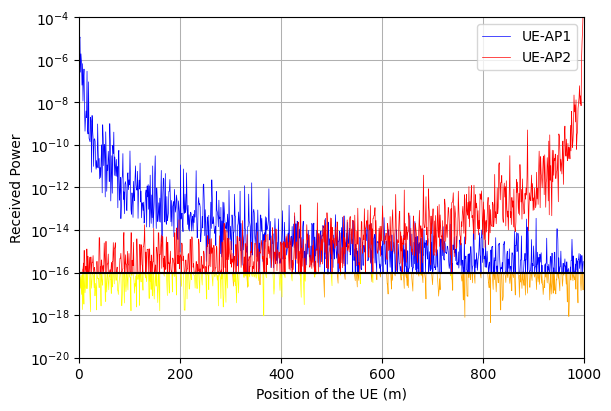

In [25]:
p_min = 1e-16
power_received1, power_received2 = [], []
connected_hard, connected_soft = [], []
outage_rate_hard, outage_rate_soft = [], []

for position in range(1, 1000): 
    ap1 = AccessPoint(position=(0, 0), number_channels=1, bandwidth=100e6, number_ue=2, shadow_effect=True)
    ap2 = AccessPoint(position=(0, 1000), number_channels=1, bandwidth=100e6, number_ue=2, shadow_effect=True)
    
    ue = UserEquipament(access_points=[ap1, ap2], position=(0, position), random_channel=True, power_control=False)
    
    power_received1.append(ue.power_received(ap1))
    power_received2.append(ue.power_received(ap2))
    
    if ue.power_received(ap1 if int(ue.index_ap) == 0 else ap2) <= p_min: 
        outage_rate_hard.append(position) 
        
    if power_received1[-1] <= p_min and power_received2[-1] <= p_min:
        outage_rate_soft.append(position) 
    
    connected_soft.append(soft_handover(ue, access_points=[ap1, ap2]))
    connected_hard.append(hard_handover(ue, ap=ap1 if int(ue.index_ap) == 0 else ap2, power_min=p_min))
    

below_x1, below_y1, above_x1, above_y1 = ajuste_da_reta(x=list(range(1, 1000)), y=power_received1, ylim=p_min)
below_x2, below_y2, above_x2, above_y2 = ajuste_da_reta(x=list(range(1, 1000)), y=power_received2, ylim=p_min)

fig, graf = plt.subplots(figsize=(6, 4), constrained_layout=True)

graf.plot(above_x1, above_y1, color="b", linewidth=0.5, label="UE-AP1")
graf.plot(below_x1, below_y1, color="orange", linewidth=0.5)
graf.plot(above_x2, above_y2, color="r", linewidth=0.5, label="UE-AP2")
graf.plot(below_x2, below_y2, color="yellow", linewidth=0.5)

graf.axhline(p_min, color='k', linestyle='-')
graf.set(title="", xlabel=f"Position of the UE (m)", ylabel="Received Power")
graf.set(xlim=(0, 1000), ylim=(1e-20, 1e-4))
graf.grid(True, which='major', linestyle='-', linewidth=0.75)
graf.set_yscale('log')
graf.legend()
plt.show()

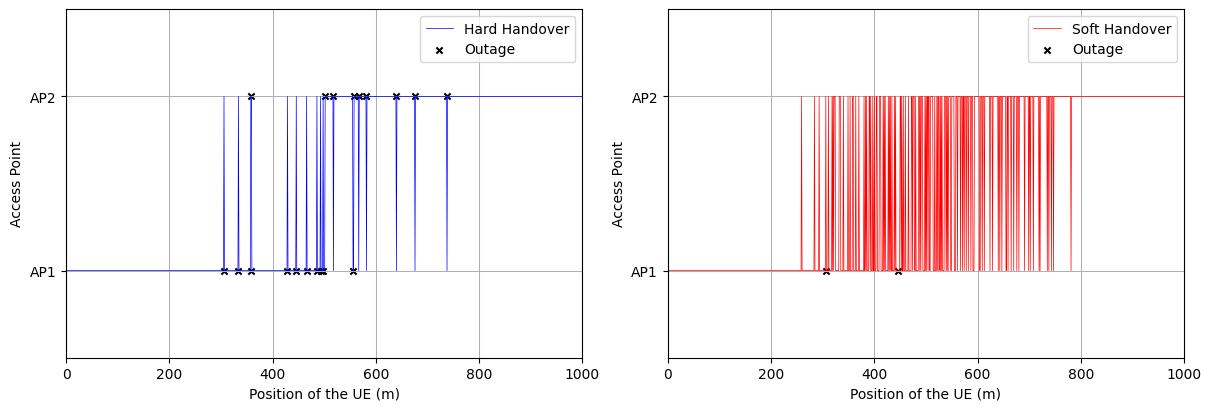

In [26]:
fig, graf = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)

graf[0].plot(range(1, 1000), connected_hard, color="b", linewidth=0.5, label="Hard Handover")
graf[0].scatter(outage_rate_hard, np.array(connected_hard)[outage_rate_hard], 
           color='black', marker='x', s=20, label='Outage')


graf[1].plot(range(1, 1000), connected_soft, color="r", linewidth=0.5, label="Soft Handover")
graf[1].scatter(outage_rate_soft, np.array(connected_soft)[outage_rate_soft], 
           color='black', marker='x', s=20, label='Outage')

graf[0].set(title="", xlabel=f"Position of the UE (m)", ylabel="Access Point")
graf[0].set(xlim=(0, 1000), ylim=(0.5, 2.5), yticks=[1.0, 2.0], yticklabels=["AP1", "AP2"])
graf[0].grid(True, which='major', linestyle='-', linewidth=0.75)
graf[0].legend()

graf[1].set(title="", xlabel=f"Position of the UE (m)", ylabel="Access Point")
graf[1].set(xlim=(0, 1000), ylim=(0.5, 2.5), yticks=[1.0, 2.0], yticklabels=["AP1", "AP2"])
graf[1].grid(True, which='major', linestyle='-', linewidth=0.75)
graf[1].legend()
plt.show()

In [27]:
outage_rate_hard, outage_rate_soft = [], []
count_hard_handover, count_soft_handover = [], []
for i in range(int(1e4)): 
    connected_soft, connected_hard = [], []
    for position in range(1, 1000): 
        ap1 = AccessPoint(position=(0, 0), number_channels=1, bandwidth=100e6, number_ue=2, shadow_effect=True)
        ap2 = AccessPoint(position=(0, 1000), number_channels=1, bandwidth=100e6, number_ue=2, shadow_effect=True)
        
        ue = UserEquipament(access_points=[ap1, ap2], position=(0, position), random_channel=True, power_control=False)
        
        power_received1 = ue.power_received(ap1)
        power_received2 = ue.power_received(ap2)
        
        if ue.power_received(ap1 if int(ue.index_ap) == 0 else ap2) <= p_min: 
            outage_rate_hard.append(1) 
        else:
            outage_rate_hard.append(0)
            
        if power_received1 <= p_min and power_received2 <= p_min:
            outage_rate_soft.append(1) 
        else:
            outage_rate_soft.append(0) 
            
        connected_soft.append(soft_handover(ue, access_points=[ap1, ap2]))
        connected_hard.append(hard_handover(ue, ap=ap1 if int(ue.index_ap) == 0 else ap2, power_min=p_min))
        
    count_hard_handover.append(count_switches(connected_hard))
    count_soft_handover.append(count_switches(connected_soft))

        
print(f"Outage Event for Hard Handover: {np.mean(outage_rate_hard)*100:.2f}%")
print(f"Average Number of Handover Switchings for Hard Handover: {np.mean(count_hard_handover):.2f}")
print(f"Outage Event for Soft Handover: {np.mean(outage_rate_soft)*100:.2f}%")
print(f"Average Number of Handover Switchings for Soft Handover: {np.mean(count_soft_handover):.2f}")

Outage Event for Hard Handover: 1.57%
Average Number of Handover Switchings for Hard Handover: 30.52
Outage Event for Soft Handover: 0.21%
Average Number of Handover Switchings for Soft Handover: 182.42


**Comentário:**



# Exercise 12

In [28]:
def improved_hard_handover(ue: UserEquipament, access_points: list[AccessPoint], power_min:float = 1e-16, alpha: int = 1):
    power_received = [ue.power_received(ap) for ap in access_points]
    other_ap = 1 if int(ue.index_ap) == 0 else 0
    if power_received[ue.index_ap] <= power_min*alpha and power_received[other_ap] > power_min*10*alpha: 
        ue.index_ap = other_ap
    return int(ue.index_ap) + 1 

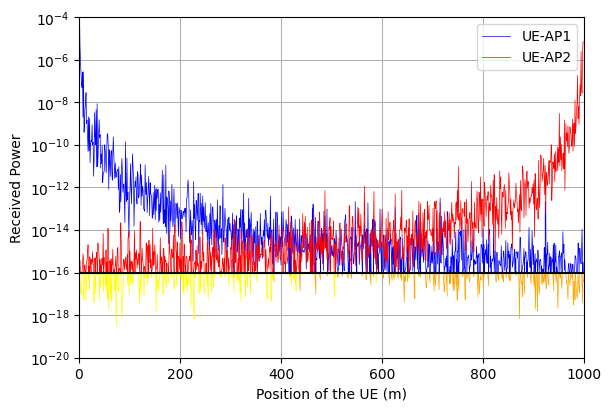

In [29]:
p_min = 1e-16
power_received1, power_received2 = [], []
connected_hard, outage_rate_hard = [], []

for position in range(1, 1000): 
    ap1 = AccessPoint(position=(0, 0), number_channels=1, bandwidth=100e6, number_ue=2, shadow_effect=True)
    ap2 = AccessPoint(position=(0, 1000), number_channels=1, bandwidth=100e6, number_ue=2, shadow_effect=True)
    
    ue = UserEquipament(access_points=[ap1, ap2], position=(0, position), random_channel=True, power_control=False)
    
    power_received1.append(ue.power_received(ap1))
    power_received2.append(ue.power_received(ap2))
    
    if ue.power_received(ap1 if int(ue.index_ap) == 0 else ap2) <= p_min: 
        outage_rate_hard.append(position) 
    
    connected_hard.append(improved_hard_handover(ue, [ap1, ap2], power_min=p_min, alpha=10))
    

below_x1, below_y1, above_x1, above_y1 = ajuste_da_reta(x=list(range(1, 1000)), y=power_received1, ylim=p_min)
below_x2, below_y2, above_x2, above_y2 = ajuste_da_reta(x=list(range(1, 1000)), y=power_received2, ylim=p_min)

fig, graf = plt.subplots(figsize=(6, 4), constrained_layout=True)

graf.plot(above_x1, above_y1, color="b", linewidth=0.5, label="UE-AP1")
graf.plot(below_x1, below_y1, color="orange", linewidth=0.5)
graf.plot(above_x2, above_y2, color="r", linewidth=0.5, label="UE-AP2")
graf.plot(below_x2, below_y2, color="yellow", linewidth=0.5)

graf.axhline(p_min, color='k', linestyle='-')
graf.set(title="", xlabel=f"Position of the UE (m)", ylabel="Received Power")
graf.set(xlim=(0, 1000), ylim=(1e-20, 1e-4))
graf.grid(True, which='major', linestyle='-', linewidth=0.75)
graf.set_yscale('log')
graf.legend()
plt.show()

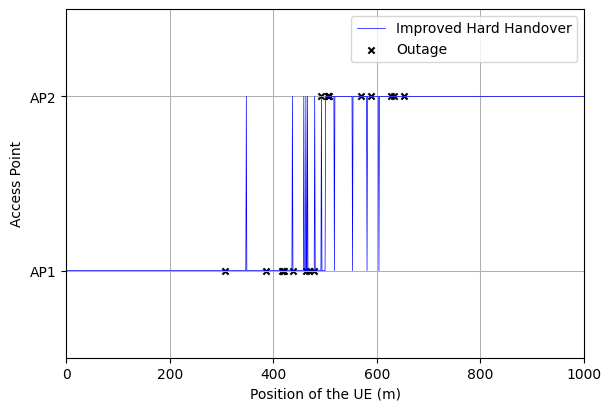

In [32]:
fig, graf = plt.subplots(figsize=(6, 4), constrained_layout=True)

graf.plot(range(1, 1000), connected_hard, color="b", linewidth=0.5, label="Improved Hard Handover")
graf.scatter(outage_rate_hard, np.array(connected_hard)[outage_rate_hard], 
           color='black', marker='x', s=20, label='Outage')

graf.set(title="", xlabel=f"Position of the UE (m)", ylabel="Access Point")
graf.set(xlim=(0, 1000), ylim=(0.5, 2.5), yticks=[1.0, 2.0], yticklabels=["AP1", "AP2"])
graf.grid(True, which='major', linestyle='-', linewidth=0.75)
graf.legend()

plt.show()

In [31]:
outage_rate_ihard, count_ihard_handover = [], []
for i in range(int(1e4)): 
    connected_hard = []
    for position in range(1, 1000): 
        ap1 = AccessPoint(position=(0, 0), number_channels=1, bandwidth=100e6, number_ue=2, shadow_effect=True)
        ap2 = AccessPoint(position=(0, 1000), number_channels=1, bandwidth=100e6, number_ue=2, shadow_effect=True)
        
        ue = UserEquipament(access_points=[ap1, ap2], position=(0, position), random_channel=True, power_control=False)
        
        power_received1 = ue.power_received(ap1)
        power_received2 = ue.power_received(ap2)
        
        if ue.power_received(ap1 if int(ue.index_ap) == 0 else ap2) <= p_min: 
            outage_rate_ihard.append(1) 
        else:
            outage_rate_ihard.append(0) 
            
        connected_hard.append(improved_hard_handover(ue, [ap1, ap2], power_min=p_min, alpha=10))
    
    count_ihard_handover.append(count_switches(connected_hard))

print(f"Outage Event for Improved Hard Handover: {np.mean(outage_rate_ihard)*100:.2f}%")
print(f"Average Number of Handover Switchings for Improved Hard Handover: {np.mean(count_ihard_handover):.2f}")


Outage Event for Improved Hard Handover: 1.56%
Average Number of Handover Switchings for Improved Hard Handover: 24.46
